In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
retail_data = pd.read_csv('C:\\Users\\Bhavani\\OneDrive\\Desktop\\durga\\Project\\retail_sales_dataset.csv')

In [3]:
print(retail_data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
print(retail_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [5]:
print(retail_data.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [6]:
retail_data['Date'] = pd.to_datetime(retail_data['Date'])
retail_data.set_index('Date', inplace=True)

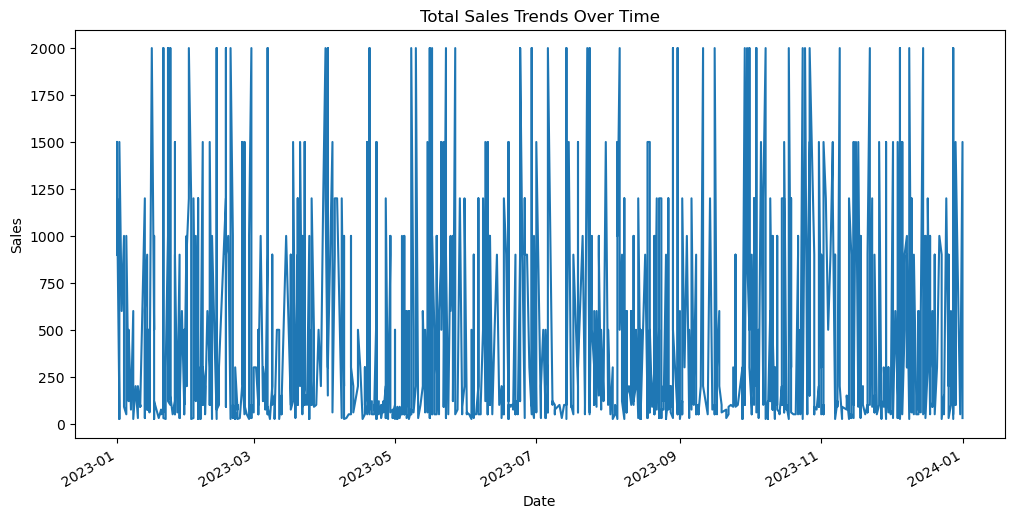

In [7]:
plt.figure(figsize=(12, 6))
retail_data['Total Amount'].plot()
plt.title('Total Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [8]:
weekly_sales = retail_data.resample('W').sum()

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_8492\1229561822.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = retail_data.resample('W').sum()


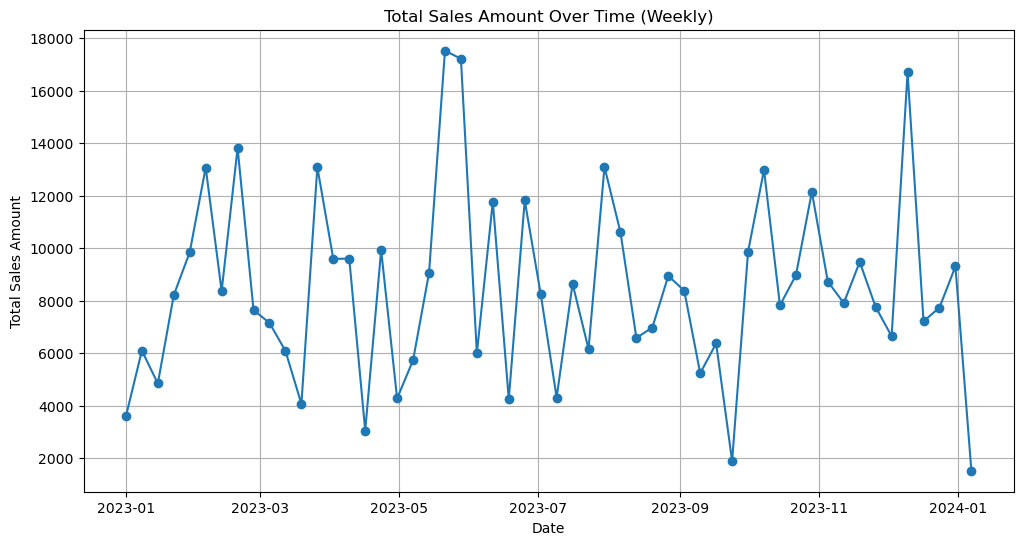

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales['Total Amount'], marker='o')
plt.title('Total Sales Amount Over Time (Weekly)')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

In [10]:
decomposition = seasonal_decompose(weekly_sales['Total Amount'], model='additive', period=12)  # Assuming seasonality period of 12 (monthly data)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

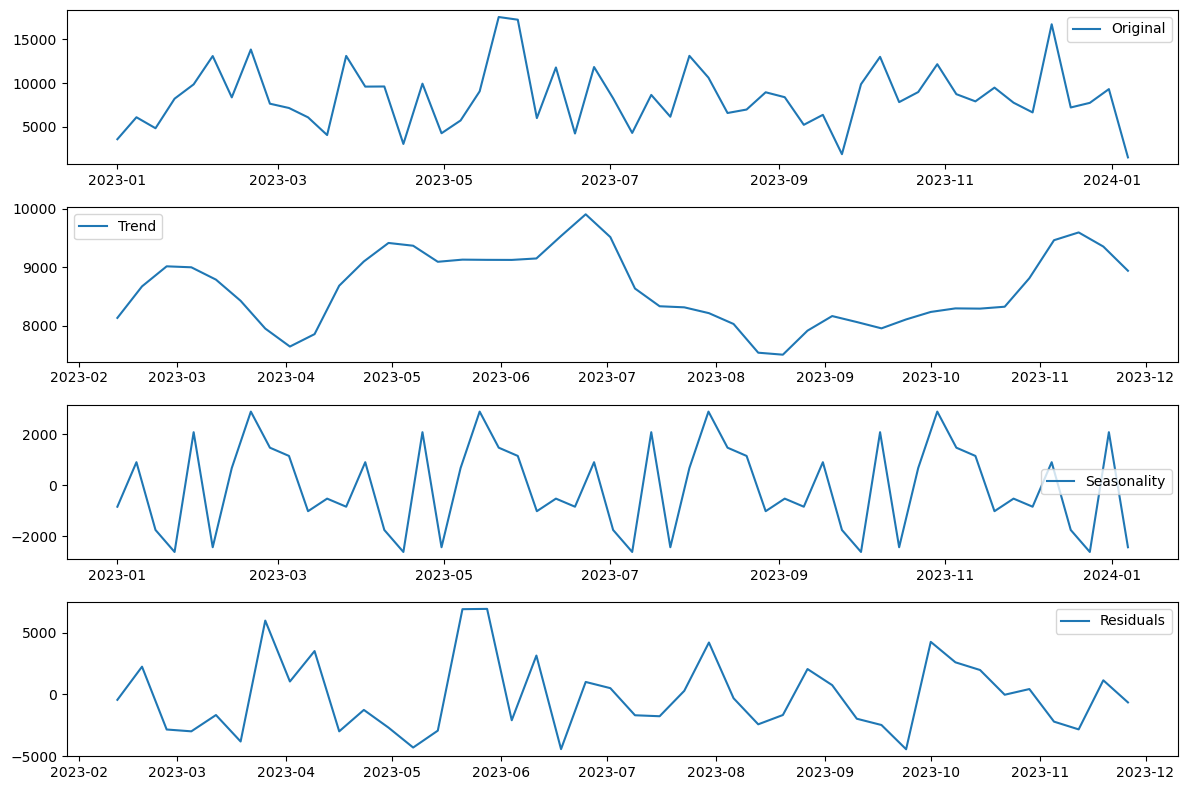

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(weekly_sales['Total Amount'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

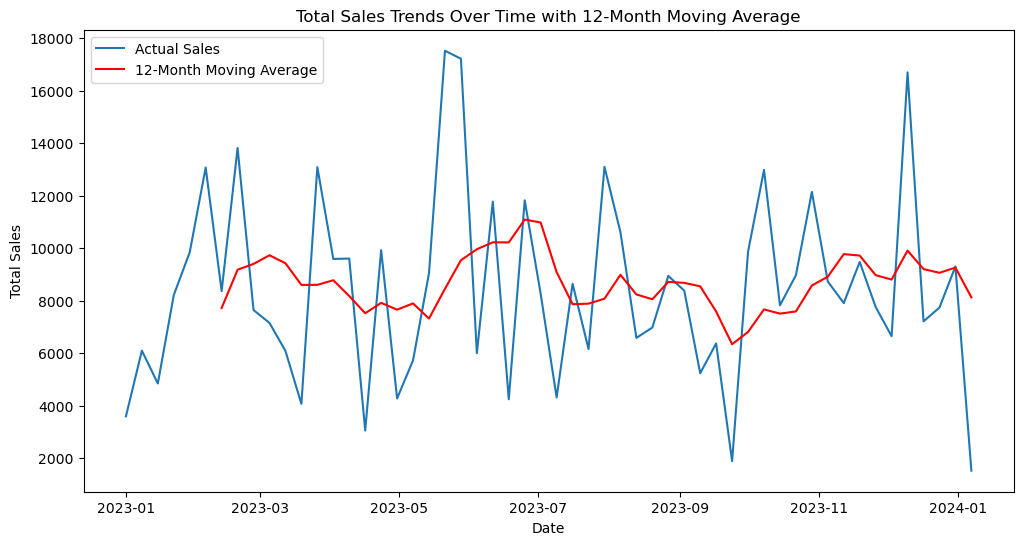

In [12]:
rolling_mean =weekly_sales['Total Amount'].rolling(window=7).mean()  # 12-month moving average
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Total Amount'], label='Actual Sales')
plt.plot(rolling_mean, label='12-Month Moving Average', color='red')
plt.title('Total Sales Trends Over Time with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [13]:
age_gender_segmentation = retail_data.groupby(['Gender', 'Age']).size().unstack()
print(age_gender_segmentation)

Age     18  19  20  21  22  23  24  25  26  27  ...  55  56  57  58  59  60  \
Gender                                          ...                           
Female  13  11  12   7  14  10   5   9  15  13  ...  13  10  14   8   9  13   
Male     8  10   9  13  13  14  10  11   7  10  ...   8   9  16   6   8   9   

Age     61  62  63  64  
Gender                  
Female   6  11   6  19  
Male    12  16  11  12  

[2 rows x 47 columns]


In [14]:
gender_counts = retail_data['Gender'].value_counts()
age_mean = retail_data['Age'].mean()
age_median = retail_data['Age'].median()

In [15]:
product_category_counts = retail_data['Product Category'].value_counts()
quantity_stats = retail_data['Quantity'].describe()
price_stats = retail_data['Price per Unit'].describe()
total_amount_stats = retail_data['Total Amount'].describe()

In [16]:
retail_data['Age Group'] = pd.cut(retail_data['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61+'])
age_group_counts = retail_data['Age Group'].value_counts()


In [17]:
male_sales = retail_data[retail_data['Gender'] == 'Male']['Total Amount']
female_sales = retail_data[retail_data['Gender'] == 'Female']['Total Amount']

In [18]:
t_statistic, p_value = ttest_ind(male_sales, female_sales)
print('T-statistic:', t_statistic)
print('P-value:', p_value)

T-statistic: -0.03161341824319852
P-value: 0.9747866634918314


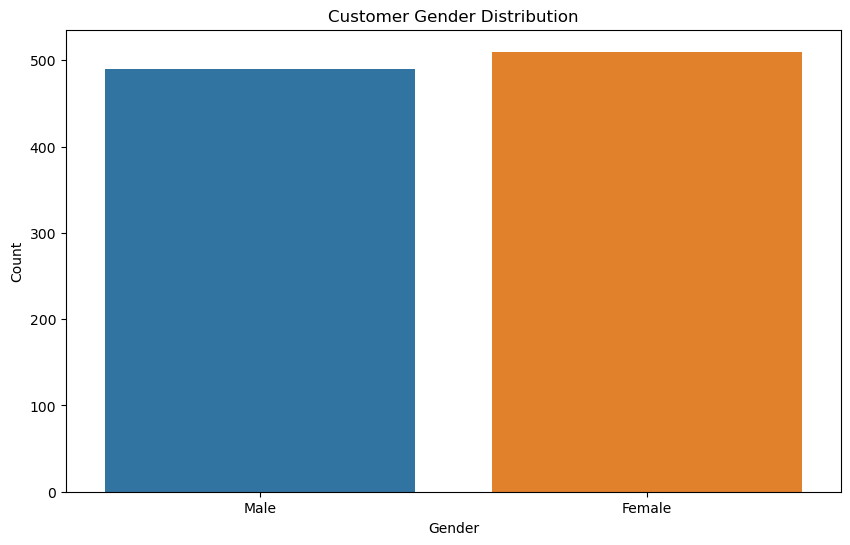

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=retail_data)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

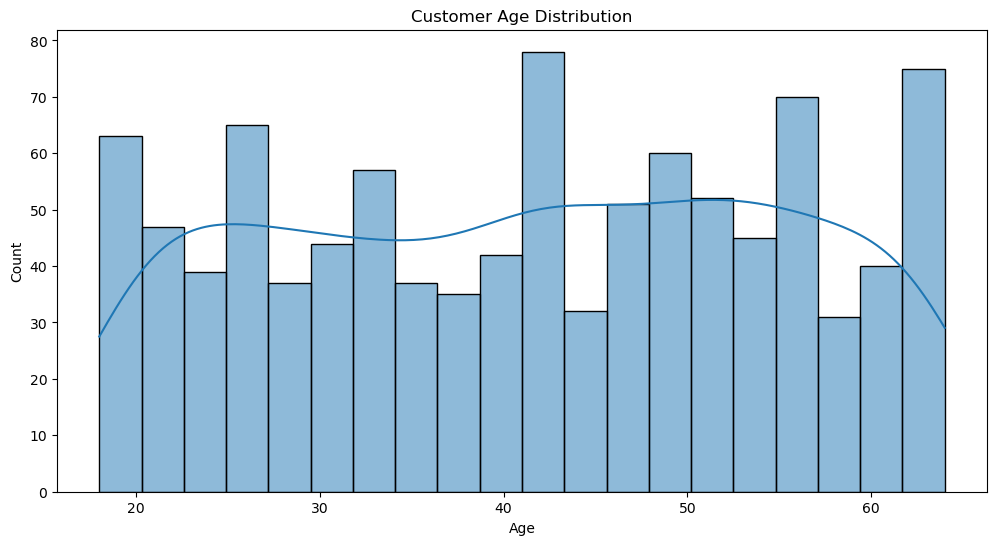

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(retail_data['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [21]:
X = retail_data[['Quantity', 'Price per Unit']]  
y = retail_data['Total Amount']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)

C:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Bhavani\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 215.7089259035331
Test RMSE: 204.5991524246532


In [26]:
popularity = retail_data['Product Category'].value_counts()
top_categories = popularity.head(3).index.tolist()
print("Top 3 Recommended Product Categories:", top_categories)

Top 3 Recommended Product Categories: ['Clothing', 'Electronics', 'Beauty']


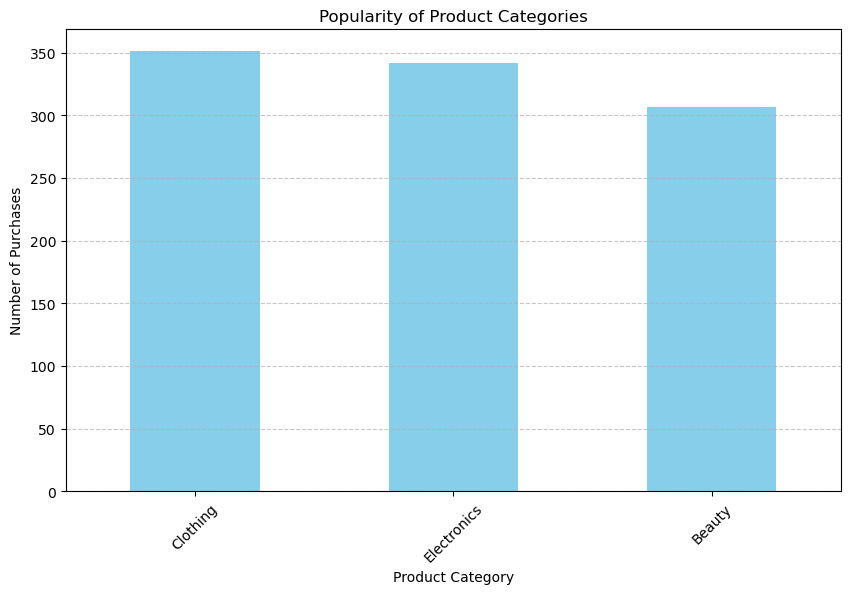

In [27]:
plt.figure(figsize=(10, 6))
popularity.plot(kind='bar', color='skyblue')
plt.title('Popularity of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

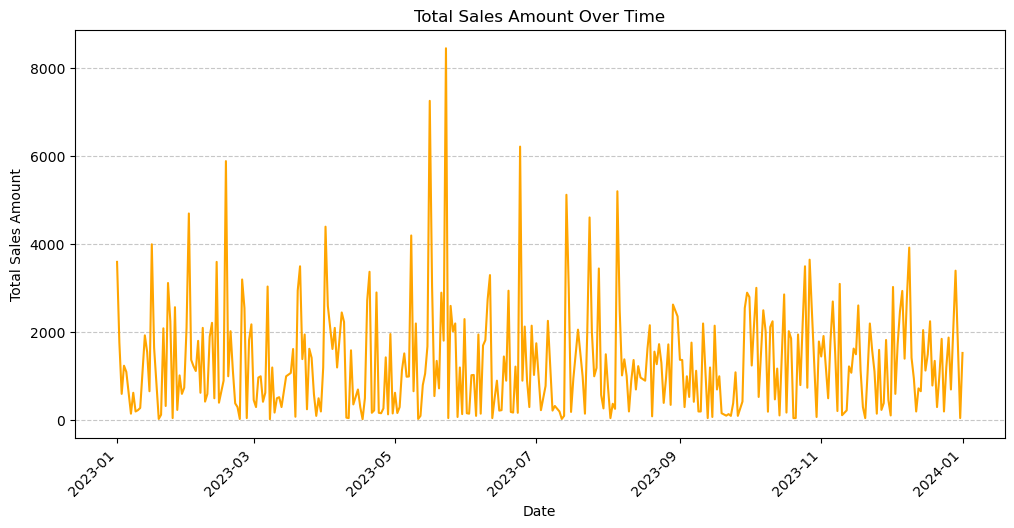

In [28]:
plt.figure(figsize=(12, 6))
retail_data.groupby('Date')['Total Amount'].sum().plot(kind='line', color='orange')
plt.title('Total Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


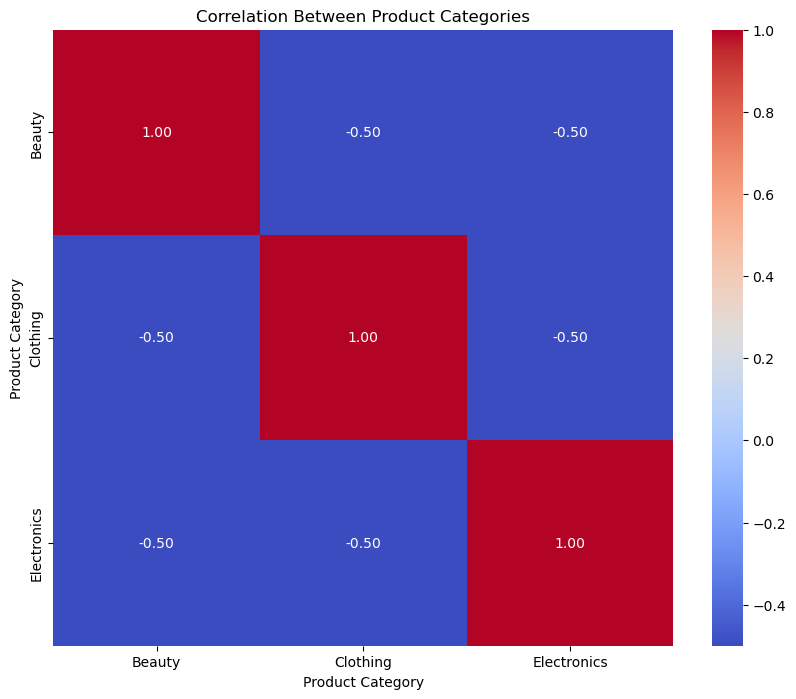

In [29]:
sales_by_category = retail_data.groupby('Product Category')['Total Amount'].sum()
sales_pivot = sales_by_category.reset_index().pivot_table(index='Product Category', columns='Product Category', values='Total Amount',aggfunc='sum', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(sales_pivot.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Product Category')
plt.show()


In [30]:
gender_counts = retail_data['Gender'].value_counts()
age_groups = pd.cut(retail_data['Age'], bins=[0, 20, 30, 40, 50, 60, float('inf')], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
age_group_counts = age_groups.value_counts()
if gender_counts['Male'] > gender_counts['Female']:
    print("Targeted Marketing Campaign: Focus on male customers.")
else:
    print("Targeted Marketing Campaign: Focus on female customers.")

if age_group_counts['21-30'] > age_group_counts['31-40']:
    print("Targeted Marketing Campaign: Tailor promotions for customers aged 21-30.")
else:
    print("Targeted Marketing Campaign: Tailor promotions for customers aged 31-40.")


Targeted Marketing Campaign: Focus on female customers.
Targeted Marketing Campaign: Tailor promotions for customers aged 21-30.


In [31]:
peak_months = weekly_sales.idxmax()
print("Peak Sales Months:", peak_months)

Peak Sales Months: Transaction ID   2023-12-10
Age              2023-05-21
Quantity         2023-03-26
Price per Unit   2023-05-21
Total Amount     2023-05-21
dtype: datetime64[ns]
